# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


In [3]:
df = pd.read_csv('wfpvam_foodprices.csv')
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_5060\2872717829.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('wfpvam_foodprices.csv')


,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,1,2014,50.0,NaN
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,3,2014,50.0,NaN
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,4,2014,50.0,NaN
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,5,2014,50.0,NaN


In [4]:
df.isnull().sum()

adm0_id                     0
adm0_name                   0
adm1_id                     0
adm1_name              463143
mkt_id                      0
mkt_name                    0
cm_id                       0
cm_name                     0
cur_name                    0
pt_id                       0
pt_name                     0
um_id                       0
um_name                     0
mp_month                    0
mp_year                     0
mp_price                    0
mp_commoditysource    1048575
dtype: int64

In [5]:
df.rename(columns={'adm0_id': 'country_id', 'adm0_name':'country', 'adm1_id':'region_id', 'adm1_name':'region', 'mkt_id':'market_id', 'mkt_name':'market_name', 'cm_id': 'comodity_id', 'cm_name':'comodity'}, inplace=True)

In [6]:
df.pop('mp_commoditysource')

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
1048570   NaN
1048571   NaN
1048572   NaN
1048573   NaN
1048574   NaN
Name: mp_commoditysource, Length: 1048575, dtype: float64

In [7]:
print('summary statistic for product price\n')
df['mp_price'].describe()

summary statistic for product price



count    1.048575e+06
mean     6.282787e+03
std      6.414777e+04
min      0.000000e+00
25%      4.090900e+01
50%      2.795000e+02
75%      2.000000e+03
max      2.177778e+07
Name: mp_price, dtype: float64

In [8]:
print(f'number of unique comodities is : {df['comodity'].nunique()}')
df['comodity'].value_counts()

number of unique comodities is : 609


comodity
Sugar - Retail                        29160
Wheat flour - Retail                  25419
Rice - Retail                         24873
Oil (palm) - Retail                   20244
Maize - Retail                        19219
                                      ...  
Butter (goat milk) - Retail               2
Beans (haricot, white) - Wholesale        2
Maize flour (imported) - Retail           2
Kocho - Retail                            1
Beans (haricot, red) - Wholesale          1
Name: count, Length: 609, dtype: int64

sugar-retail is the most frequent in the dataset.

In [9]:
print('marked price grouped by country')
df.groupby('country')['mp_price'].mean().sort_values(ascending = False)

marked price grouped by country


country
Iran  (Islamic Republic of)         81633.712500
Colombia                            51240.036125
Indonesia                           34460.108029
Lao People's Democratic Republic    24048.017546
Afghanistan                         23177.212745
Cameroon                            12194.504486
Guinea                              10879.303370
Cambodia                             7975.689359
Chad                                 6402.038909
Lebanon                              5798.964187
Iraq                                 3262.346614
Burkina Faso                         2844.646005
Madagascar                           2549.656122
Burundi                              2516.897501
Democratic Republic of the Congo     2497.709444
Eritrea                              2272.000000
Congo                                1461.473620
Liberia                              1273.684710
Ethiopia                             1219.600790
Kenya                                1191.952042
Costa Rica  

In [10]:
df.head()


,country_id,country,region_id,region,market_id,market_name,comodity_id,comodity,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,1,2014,50.0
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,2,2014,50.0
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,3,2014,50.0
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,4,2014,50.0
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,5,2014,50.0


In [11]:
# convert the date table to a datetime type
# have a column that contains name of the months instead of the version with numbers
df['date'] = pd.to_datetime(df['mp_year'])

# create a new column with month names that correspond to the month numbers


In [12]:
df.head()


,country_id,country,region_id,region,market_id,market_name,comodity_id,comodity,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,date
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,1,2014,50.0,1970-01-01 00:00:00.000002014
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,2,2014,50.0,1970-01-01 00:00:00.000002014
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,3,2014,50.0,1970-01-01 00:00:00.000002014
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,4,2014,50.0,1970-01-01 00:00:00.000002014
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,5,2014,50.0,1970-01-01 00:00:00.000002014


In [13]:
df = df.drop(columns = 'date')

In [14]:
import calendar

df["month"] = df["mp_month"].map(lambda m: calendar.month_name[int(m)])

In [15]:
df.head()

,country_id,country,region_id,region,market_id,market_name,comodity_id,comodity,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,month
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,1,2014,50.0,January
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,2,2014,50.0,February
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,3,2014,50.0,March
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,4,2014,50.0,April
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,5,2014,50.0,May


In [16]:
df["month_year"] = pd.to_datetime(
    dict(year=df["mp_year"], month=df["mp_month"], day=1)
)

In [17]:
df.head()

,country_id,country,region_id,region,market_id,market_name,comodity_id,comodity,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,month,month_year
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,1,2014,50.0,January,2014-01-01
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,2,2014,50.0,February,2014-02-01
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,3,2014,50.0,March,2014-03-01
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,4,2014,50.0,April,2014-04-01
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,5,2014,50.0,May,2014-05-01


In [19]:
df["um_name"].unique()

array(['KG', 'Day', 'Unit', 'L', 'USD/LCU', '30 pcs', '500 G', '125 G',
       'Packet', '900 G', '50 Pounds', '100 KG', '46 KG', '11.5 KG',
       'Pound', 'Cuartilla', 'Libra', '5 L', '10 pcs', '90 KG', '1 piece',
       '400 G', '15 KG', '5 KG', '12 KG', '20 KG', '120 KG', '20 L',
       '18 KG', '50 KG', '160 KG', '1.5 L', 'Sack', 'Package', 'Head',
       'MT', '85 G', 'Gallon', '380 G', '500 ML', 'Month', 'Course',
       '100 Pounds', '168 G', '45 KG', '70 G', '200 G', '68 KG', '109 KG',
       '91 KG', '93 KG', '10 KG', 'Bunch', '250 KG', '100 Tubers',
       '73 KG', '84 KG', '52 KG', '27 KG', '16 KG', '650 G', '750 ML',
       '115 G', '360 pcs', '50 pcs', '100 pcs', 'Marmite', '350 G',
       '385 G', '1.8 KG', 'Cylinder', '4 pcs', '150 ml', '2 KG', '1.8 L',
       '170 G', '1.5 KG', '300 G', '0.8 KG', '160 G', '750 G', '12.5 KG',
       '200 ML', '150 G', '1.3 KG', '185 G', 'Loaf', '2.25 KG', '5 pcs',
       '250 G', '11 KG', 'Brush', '100 ML', 'Bar', '250 ML'], dtype=objec

In [23]:
df["um_name"] = (
    df["um_name"]
    .str.lower()
    .str.replace(" ", "", regex=False)
)

In [24]:
df['um_name'].unique()

array(['kg', 'day', 'unit', 'l', 'usd/lcu', '30pcs', '500g', '125g',
       'packet', '900g', '50pounds', '100kg', '46kg', '11.5kg', 'pound',
       'cuartilla', 'libra', '5l', '10pcs', '90kg', '1piece', '400g',
       '15kg', '5kg', '12kg', '20kg', '120kg', '20l', '18kg', '50kg',
       '160kg', '1.5l', 'sack', 'package', 'head', 'mt', '85g', 'gallon',
       '380g', '500ml', 'month', 'course', '100pounds', '168g', '45kg',
       '70g', '200g', '68kg', '109kg', '91kg', '93kg', '10kg', 'bunch',
       '250kg', '100tubers', '73kg', '84kg', '52kg', '27kg', '16kg',
       '650g', '750ml', '115g', '360pcs', '50pcs', '100pcs', 'marmite',
       '350g', '385g', '1.8kg', 'cylinder', '4pcs', '150ml', '2kg',
       '1.8l', '170g', '1.5kg', '300g', '0.8kg', '160g', '750g', '12.5kg',
       '200ml', '150g', '1.3kg', '185g', 'loaf', '2.25kg', '5pcs', '250g',
       '11kg', 'brush', '100ml', 'bar', '250ml'], dtype=object)

In [25]:
import re

MASS_UNITS = {
    "kg": 1,
    "g": 0.001,
    "pound": 0.453592,
    "pounds": 0.453592,
    "libra": 0.453592,
}

VOLUME_UNITS = {
    "l": 1,
    "ml": 0.001,
    "gallon": 3.78541,
}

COUNT_UNITS = {
    "pcs": 1,
    "piece": 1,
    "unit": 1,
    "head": 1,
    "bunch": 1,
}

In [26]:
def parse_quantity_unit(um_name):
    um_name = um_name.lower().strip()

    match = re.match(r"([\d\.]+)?\s*([a-z/]+)", um_name)
    if not match:
        return None, None

    qty = float(match.group(1)) if match.group(1) else 1.0
    unit = match.group(2)

    return qty, unit

In [27]:
def convert_to_si(um_name, mp_price):
    qty, unit = parse_quantity_unit(um_name)

    if qty is None:
        return np.nan

    if unit in MASS_UNITS:
        si_qty = qty * MASS_UNITS[unit]
        return mp_price / si_qty

    if unit in VOLUME_UNITS:
        si_qty = qty * VOLUME_UNITS[unit]
        return mp_price / si_qty

    if unit in COUNT_UNITS:
        return mp_price / qty

    return np.nan

In [28]:
df["price_per_si"] = df.apply(
    lambda r: convert_to_si(r["um_name"], r["mp_price"]),
    axis=1,
)

In [29]:
df.head()

,country_id,country,region_id,region,market_id,market_name,comodity_id,comodity,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,month,month_year,price_per_si
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,kg,1,2014,50.0,January,2014-01-01,50.0
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,kg,2,2014,50.0,February,2014-02-01,50.0
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,kg,3,2014,50.0,March,2014-03-01,50.0
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,kg,4,2014,50.0,April,2014-04-01,50.0
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,kg,5,2014,50.0,May,2014-05-01,50.0


In [30]:
df['country'].unique()

array(['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Bassas da India', 'Belarus', 'Benin',
       'Bhutan', 'Bolivia', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad',
       'China', 'Colombia', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Democratic Republic of the Congo', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea',
       'Ethiopia', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Honduras', 'Indonesia',
       'Iran  (Islamic Republic of)', 'Iraq', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Lebanon', 'Lesotho',
       'Liberia', 'Libya', 'Madagascar', 'Malawi'], dtype=object)

In [31]:
df['country'].replace({'Bassas da India':'India'}, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_5060\2130528017.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].replace({'Bassas da India':'India'}, inplace=True)


array(['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'India', 'Belarus', 'Benin', 'Bhutan',
       'Bolivia', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Cape Verde', 'Central African Republic', 'Chad', 'China',
       'Colombia', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Democratic Republic of the Congo', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea',
       'Ethiopia', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Honduras', 'Indonesia',
       'Iran  (Islamic Republic of)', 'Iraq', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Lebanon', 'Lesotho',
       'Liberia', 'Libya', 'Madagascar', 'Malawi'], dtype=object)

In [39]:
import pandas as pd
import requests

# Your countries list (I shortened here; paste full list)
countries = [
    "Afghanistan",
    "Algeria",
    "Angola",
    "Argentina",
    "Armenia",
    "Azerbaijan",
    "Bangladesh",
    "India",
    "Belarus",
    "Benin",
    "Bhutan",
    "Bolivia",
    "Burkina Faso",
    "Burundi",
    "Cambodia",
    "Cameroon",
    "Cape Verde",
    "Central African Republic",
    "Chad",
    "China",
    "Colombia",
    "Congo",
    "Costa Rica",
    "Cote d'Ivoire",
    "Democratic Republic of the Congo",
    "Djibouti",
    "Dominican Republic",
    "Ecuador",
    "Egypt",
    "El Salvador",
    "Eritrea",
    "Ethiopia",
    "Gabon",
    "Gambia",
    "Georgia",
    "Ghana",
    "Guatemala",
    "Guinea",
    "Guinea-Bissau",
    "Haiti",
    "Honduras",
    "Indonesia",
    "Iran  (Islamic Republic of)",
    "Iraq",
    "Japan",
    "Jordan",
    "Kazakhstan",
    "Kenya",
    "Kyrgyzstan",
    "Lao People's Democratic Republic",
    "Lebanon",
    "Lesotho",
    "Liberia",
    "Libya",
    "Madagascar",
    "Malawi",
]

# Manual country -> currency ISO code mapping (extend as needed)
country_to_ccy = {
    "Afghanistan": "AFN",
    "Algeria": "DZD",
    "Angola": "AOA",
    "Argentina": "ARS",
    "Armenia": "AMD",
    "Azerbaijan": "AZN",
    "Bangladesh": "BDT",
    "Belarus": "BYN",
    "Benin": "XOF",
    "Bhutan": "BTN",
    "Bolivia": "BOB",
    "Burkina Faso": "XOF",
    "Burundi": "BIF",
    "Cambodia": "KHR",
    "Cameroon": "XAF",
    "Cape Verde": "CVE",
    "Central African Republic": "XAF",
    "Chad": "XAF",
    "China": "CNY",
    "Colombia": "COP",
    "Congo": "XAF",  # Republic of the Congo uses XAF
    "Costa Rica": "CRC",
    "Cote d'Ivoire": "XOF",
    "Democratic Republic of the Congo": "CDF",
    "Djibouti": "DJF",
    "Dominican Republic": "DOP",
    "Ecuador": "USD",
    "Egypt": "EGP",
    "El Salvador": "USD",
    "Eritrea": "ERN",
    "Ethiopia": "ETB",
    "Gabon": "XAF",
    "Gambia": "GMD",
    "Georgia": "GEL",
    "Ghana": "GHS",
    "Guatemala": "GTQ",
    "Guinea": "GNF",
    "Guinea-Bissau": "XOF",
    "Haiti": "HTG",
    "Honduras": "HNL",
    "Indonesia": "IDR",
    "India": "INR",
    "Iran  (Islamic Republic of)": "IRR",
    "Iraq": "IQD",
    "Japan": "JPY",
    "Jordan": "JOD",
    "Kazakhstan": "KZT",
    "Kenya": "KES",
    "Kyrgyzstan": "KGS",
    "Lao People's Democratic Republic": "LAK",
    "Lebanon": "LBP",
    "Lesotho": "LSL",
    "Liberia": "LRD",
    "Libya": "LYD",
    "Madagascar": "MGA",
    "Malawi": "MWK",
    # "Bassas da India": ??? (territory; no unique currency) -> leave unmapped
}

import pandas as pd
import requests

import pandas as pd
import requests

def fetch_kes_per_1_currency(currency_codes):
    """
    Uses open.er-api.com (no key).
    Endpoint returns rates[c] = c per 1 KES when base is KES.
    We invert to get KES per 1 unit of currency c.
    """
    currency_codes = sorted(set(currency_codes))

    url = "https://open.er-api.com/v6/latest/KES"
    resp = requests.get(url, timeout=30)
    resp.raise_for_status()

    data = resp.json()
    if data.get("result") != "success":
        raise ValueError(f"FX API error: {str(data)[:500]}")

    rates = data["rates"]  # c per 1 KES
    fx_date = data.get("time_last_update_utc")

    kes_per = {}
    for c in currency_codes:
        r = rates.get(c)
        kes_per[c] = (1.0 / r) if r not in (None, 0) else None

    return kes_per, fx_date

In [40]:
ccy_codes = [ccy for ccy in country_to_ccy.values() if ccy is not None]

kes_per_ccy, fx_date = fetch_kes_per_1_currency(ccy_codes)

fx_df = pd.DataFrame(
    {
        "country": countries,
        "currency": [country_to_ccy.get(c) for c in countries],
    }
)

fx_df["kes_per_1_currency"] = fx_df["currency"].map(kes_per_ccy)
fx_df["fx_timestamp"] = fx_date
fx_df

,country,currency,kes_per_1_currency,fx_timestamp
0,Afghanistan,AFN,1.953526,"Mon, 12 Jan 2026 00:02:31 +0000"
1,Algeria,DZD,0.991428,"Mon, 12 Jan 2026 00:02:31 +0000"
2,Angola,AOA,0.139906,"Mon, 12 Jan 2026 00:02:31 +0000"
3,Argentina,ARS,0.088786,"Mon, 12 Jan 2026 00:02:31 +0000"
4,Armenia,AMD,0.338115,"Mon, 12 Jan 2026 00:02:31 +0000"
5,Azerbaijan,AZN,75.861023,"Mon, 12 Jan 2026 00:02:31 +0000"
6,Bangladesh,BDT,1.054542,"Mon, 12 Jan 2026 00:02:31 +0000"
7,India,INR,1.429803,"Mon, 12 Jan 2026 00:02:31 +0000"
8,Belarus,BYN,44.029588,"Mon, 12 Jan 2026 00:02:31 +0000"
9,Benin,XOF,0.228965,"Mon, 12 Jan 2026 00:02:31 +0000"


In [41]:
df = df.merge(
    fx_df[["country", "currency", "kes_per_1_currency"]],
    on="country",
    how="left",
)

df["price_per_si_kes"] = df["price_per_si"] * df["kes_per_1_currency"]

In [42]:
df.head()

,country_id,country,region_id,region,market_id,market_name,comodity_id,comodity,cur_name,pt_id,...,um_name,mp_month,mp_year,mp_price,month,month_year,price_per_si,currency,kes_per_1_currency,price_per_si_kes
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,...,kg,1,2014,50.0,January,2014-01-01,50.0,AFN,1.953526,97.676281
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,...,kg,2,2014,50.0,February,2014-02-01,50.0,AFN,1.953526,97.676281
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,...,kg,3,2014,50.0,March,2014-03-01,50.0,AFN,1.953526,97.676281
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,...,kg,4,2014,50.0,April,2014-04-01,50.0,AFN,1.953526,97.676281
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,...,kg,5,2014,50.0,May,2014-05-01,50.0,AFN,1.953526,97.676281


In [45]:
# create a new column for classifying units into mass, volume, and count
MASS_UNITS = {"kg", "g", "pound", "pounds", "libra"}
VOLUME_UNITS = {"l", "ml", "gallon"}
COUNT_UNITS = {"pcs", "piece", "unit", "head", "bunch"}

def parse_unit(um_name):
    if um_name is None or (isinstance(um_name, float) and np.isnan(um_name)):
        return None

    s = str(um_name).lower().strip()
    m = re.match(r"([\d\.]+)?\s*([a-z/]+)", s)
    return m.group(2) if m else None

In [46]:
df["unit"] = df["um_name"].apply(parse_unit)

df["dimension"] = np.select(
    [
        df["unit"].isin(MASS_UNITS),
        df["unit"].isin(VOLUME_UNITS),
        df["unit"].isin(COUNT_UNITS),
    ],
    ["mass", "volume", "count"],
    default="unknown",
)


In [47]:
df.head()

,country_id,country,region_id,region,market_id,market_name,comodity_id,comodity,cur_name,pt_id,...,mp_year,mp_price,month,month_year,price_per_si,currency,kes_per_1_currency,price_per_si_kes,unit,dimension
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,...,2014,50.0,January,2014-01-01,50.0,AFN,1.953526,97.676281,kg,mass
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,...,2014,50.0,February,2014-02-01,50.0,AFN,1.953526,97.676281,kg,mass
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,...,2014,50.0,March,2014-03-01,50.0,AFN,1.953526,97.676281,kg,mass
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,...,2014,50.0,April,2014-04-01,50.0,AFN,1.953526,97.676281,kg,mass
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,...,2014,50.0,May,2014-05-01,50.0,AFN,1.953526,97.676281,kg,mass


In [48]:
df.drop(columns = ['region_id', 'market_id', 'comodity_id', 'pt_id', 'um_id'])

,country_id,country,region,market_name,comodity,cur_name,pt_name,um_name,mp_month,mp_year,mp_price,month,month_year,price_per_si,currency,kes_per_1_currency,price_per_si_kes,unit,dimension
0,1,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,kg,1,2014,50.0000,January,2014-01-01,50.0000,AFN,1.953526,97.676281,kg,mass
1,1,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,kg,2,2014,50.0000,February,2014-02-01,50.0000,AFN,1.953526,97.676281,kg,mass
2,1,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,kg,3,2014,50.0000,March,2014-03-01,50.0000,AFN,1.953526,97.676281,kg,mass
3,1,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,kg,4,2014,50.0000,April,2014-04-01,50.0000,AFN,1.953526,97.676281,kg,mass
4,1,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,kg,5,2014,50.0000,May,2014-05-01,50.0000,AFN,1.953526,97.676281,kg,mass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,152,Malawi,Southern Region,Thondwe,Maize - Retail,MWK,Retail,kg,8,2014,75.0733,August,2014-08-01,75.0733,MWK,0.074140,5.565905,kg,mass
1048571,152,Malawi,Southern Region,Thondwe,Maize - Retail,MWK,Retail,kg,9,2014,75.8300,September,2014-09-01,75.8300,MWK,0.074140,5.622007,kg,mass
1048572,152,Malawi,Southern Region,Thondwe,Maize - Retail,MWK,Retail,kg,12,2014,74.3300,December,2014-12-01,74.3300,MWK,0.074140,5.510797,kg,mass
1048573,152,Malawi,Southern Region,Thondwe,Maize - Retail,MWK,Retail,kg,1,2015,81.3500,January,2015-01-01,81.3500,MWK,0.074140,6.031258,kg,mass


In [52]:
df['comodity'].unique()

array(['Bread - Retail', 'Wheat - Retail', 'Rice (low quality) - Retail',
       'Wage (qualified labour) - Retail',
       'Livestock (sheep, one-year-old alive female) - Retail',
       'Fuel (diesel) - Retail', 'Exchange rate - Retail',
       'Wage (non-qualified labour, non-agricultural) - Retail',
       'Oil (cooking) - Retail', 'Sugar - Retail', 'Pulses - Retail',
       'Wheat flour (high quality) - Retail', 'Salt - Retail',
       'Rice (high quality) - Retail',
       'Wheat flour (low quality) - Retail', 'Wheat flour - Retail',
       'Rice - Retail', 'Beans (white) - Retail', 'Milk - Retail',
       'Potatoes - Retail', 'Eggs - Retail', 'Meat (chicken) - Retail',
       'Lentils - Retail', 'Pasta - Retail', 'Tomatoes - Retail',
       'Oil - Retail', 'Meat (beef) - Retail', 'Cheese (dry) - Retail',
       'Carrots - Retail', 'Onions - Retail', 'Bananas - Retail',
       'Tea - Retail', 'Fuel (petrol-gasoline) - Retail',
       'Fish (canned) - Retail', 'Apples - Retail', '

In [55]:
# simplify the comodity column
# strip the words after the comodity name
import re

df["commodity_simplified"] = (
    df["comodity"]
    .astype(str)
    .str.lower()
    .str.strip()
    # normalize spaces around hyphens
    .str.replace(r"\s*-\s*", " - ", regex=True)
    # remove trailing " - retail/wholesale/producer"
    .str.replace(r"\s*-\s*(retail|wholesale|producer)\s*$", "", regex=True)
    # collapse multiple spaces
    .str.replace(r"\s+", " ", regex=True)
    .str.strip()
)

In [60]:
df[["comodity", "commodity_simplified"]].drop_duplicates().head(30)

,comodity,commodity_simplified
0,Bread - Retail,bread
73,Wheat - Retail,wheat
279,Rice (low quality) - Retail,rice (low quality)
435,Wage (qualified labour) - Retail,wage (qualified labour)
505,"Livestock (sheep, one-year-old alive female) -...","livestock (sheep, one - year - old alive female)"
537,Fuel (diesel) - Retail,fuel (diesel)
665,Exchange rate - Retail,exchange rate
735,"Wage (non-qualified labour, non-agricultural) ...","wage (non - qualified labour, non - agricultural)"
1693,Oil (cooking) - Retail,oil (cooking)
1723,Sugar - Retail,sugar


In [62]:
df.loc[df["commodity_simplified"] == "exchange rate"].drop_duplicates()

,country_id,country,region_id,region,market_id,market_name,comodity_id,comodity,cur_name,pt_id,...,mp_price,month,month_year,price_per_si,currency,kes_per_1_currency,price_per_si_kes,unit,dimension,commodity_simplified
665,1,Afghanistan,272,Badakhshan,266,Fayzabad,305,Exchange rate - Retail,AFN,15,...,57.550,February,2014-02-01,NaN,AFN,1.953526,NaN,usd/lcu,unknown,exchange rate
666,1,Afghanistan,272,Badakhshan,266,Fayzabad,305,Exchange rate - Retail,AFN,15,...,56.600,July,2014-07-01,NaN,AFN,1.953526,NaN,usd/lcu,unknown,exchange rate
667,1,Afghanistan,272,Badakhshan,266,Fayzabad,305,Exchange rate - Retail,AFN,15,...,56.625,August,2014-08-01,NaN,AFN,1.953526,NaN,usd/lcu,unknown,exchange rate
668,1,Afghanistan,272,Badakhshan,266,Fayzabad,305,Exchange rate - Retail,AFN,15,...,57.000,September,2014-09-01,NaN,AFN,1.953526,NaN,usd/lcu,unknown,exchange rate
669,1,Afghanistan,272,Badakhshan,266,Fayzabad,305,Exchange rate - Retail,AFN,15,...,57.375,October,2014-10-01,NaN,AFN,1.953526,NaN,usd/lcu,unknown,exchange rate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977630,144,Liberia,1828,Sinoe,1748,Greenville,305,Exchange rate - Retail,LRD,15,...,198.000,April,2020-04-01,NaN,LRD,0.718900,NaN,usd/lcu,unknown,exchange rate
977631,144,Liberia,1828,Sinoe,1748,Greenville,305,Exchange rate - Retail,LRD,15,...,198.000,May,2020-05-01,NaN,LRD,0.718900,NaN,usd/lcu,unknown,exchange rate
977632,144,Liberia,1828,Sinoe,1748,Greenville,305,Exchange rate - Retail,LRD,15,...,197.000,June,2020-06-01,NaN,LRD,0.718900,NaN,usd/lcu,unknown,exchange rate
977633,144,Liberia,1828,Sinoe,1748,Greenville,305,Exchange rate - Retail,LRD,15,...,198.000,July,2020-07-01,NaN,LRD,0.718900,NaN,usd/lcu,unknown,exchange rate


In [63]:
df.head()

,country_id,country,region_id,region,market_id,market_name,comodity_id,comodity,cur_name,pt_id,...,mp_price,month,month_year,price_per_si,currency,kes_per_1_currency,price_per_si_kes,unit,dimension,commodity_simplified
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,...,50.0,January,2014-01-01,50.0,AFN,1.953526,97.676281,kg,mass,bread
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,...,50.0,February,2014-02-01,50.0,AFN,1.953526,97.676281,kg,mass,bread
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,...,50.0,March,2014-03-01,50.0,AFN,1.953526,97.676281,kg,mass,bread
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,...,50.0,April,2014-04-01,50.0,AFN,1.953526,97.676281,kg,mass,bread
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,...,50.0,May,2014-05-01,50.0,AFN,1.953526,97.676281,kg,mass,bread


In [65]:
df.columns

Index(['country_id', 'country', 'region_id', 'region', 'market_id',
       'market_name', 'comodity_id', 'comodity', 'cur_name', 'pt_id',
       'pt_name', 'um_id', 'um_name', 'mp_month', 'mp_year', 'mp_price',
       'month', 'month_year', 'price_per_si', 'currency', 'kes_per_1_currency',
       'price_per_si_kes', 'unit', 'dimension', 'commodity_simplified'],
      dtype='object')

In [66]:
# summary statistics
print("here is a summary statistic for price per si in kes\n")
df['price_per_si_kes'].describe()

here is a summary statistic for price per si in kes



count    1.020495e+06
mean     8.171167e+02
std      5.369493e+04
min      0.000000e+00
25%      3.490615e+01
50%      7.445193e+01
75%      1.488271e+02
max      1.139557e+07
Name: price_per_si_kes, dtype: float64

In [69]:
# which commodity appears most frequently in the dataset
top_commodity = df['commodity_simplified'].value_counts().head(10)
print(top_commodity)
print (f"The top commodity is {top_commodity.index[0]} with {top_commodity.iloc[0]} occurrences.")

commodity_simplified
sugar            29814
rice             27610
wheat flour      27440
maize (white)    24709
maize            24660
oil (palm)       20291
onions           19909
millet           18760
wheat            18738
tomatoes         18516
Name: count, dtype: int64
The top commodity is sugar with 29814 occurrences.


In [78]:
# calculate average price per country
df.groupby("country")["price_per_si_kes"].mean().sort_values(ascending=False)

country
Afghanistan                         55191.062829
Chad                                 1468.319979
Jordan                                386.116753
Ethiopia                              364.330628
Congo                                 334.626058
Armenia                               276.939943
Japan                                 270.088235
Indonesia                             263.198656
Iraq                                  261.551354
Guatemala                             240.082905
Central African Republic              226.957022
Iran  (Islamic Republic of)           212.404570
Guinea-Bissau                         200.833871
Libya                                 196.310613
Eritrea                               195.299740
Cambodia                              185.045727
Algeria                               176.411043
Cote d'Ivoire                         174.235931
Guinea                                160.501702
Gabon                                 158.229235
Democratic R

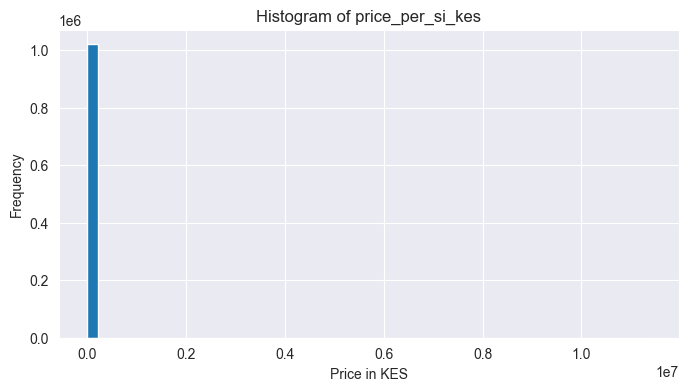

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x = pd.to_numeric(df["price_per_si_kes"], errors="coerce")
x = x.replace([np.inf, -np.inf], np.nan).dropna()

plt.figure(figsize=(8, 4))
plt.hist(x, bins=50)
plt.title("Histogram of price_per_si_kes")
plt.xlabel("Price in KES")
plt.ylabel("Frequency")
plt.show()

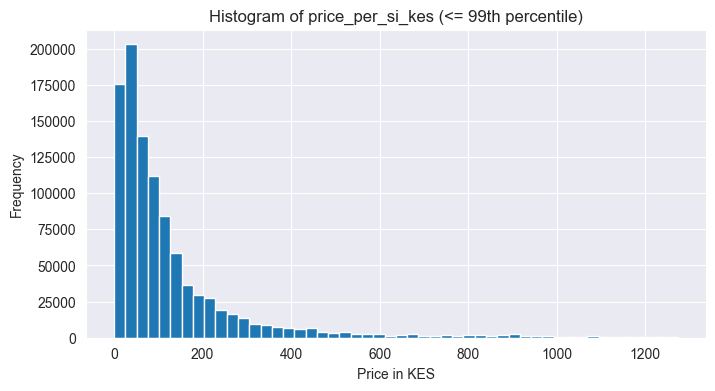

In [82]:


x = pd.to_numeric(df["price_per_si_kes"], errors="coerce")
x = x.replace([np.inf, -np.inf], np.nan).dropna()

cap = x.quantile(0.99)
plt.figure(figsize=(8, 4))
plt.hist(x[x <= cap], bins=50)
plt.title("Histogram of price_per_si_kes (<= 99th percentile)")
plt.xlabel("Price in KES")
plt.ylabel("Frequency")
plt.show()